# EasyVisa Project

## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ensemble_Tech/EasyVisa.csv')
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Data Overview


### View the first and last 5 rows of the dataset.

In [ ]:
# returns the first 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# returns the last 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [ ]:
#shape of the data
data.shape

(25480, 12)

There are 25480 rows and 12 columns.

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


There are 2 Integer type columns , 9 string/object type columns and 1 float type column.

### Statistical summary

In [ ]:
#statistical summary for the numeric data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Inferences:*

1. Data Completeness: The count for each column suggests there are no missing values.

2. Categorical Variables: The categorical variables like
> * 'continent' : Has 6 unique values with Asia is the most frequent continent, occurring 16,861 times.
> *'education_of_employee' : Has 4 unique values. The most common education level is "Bachelor's," occurring 10,234 times.
> * 'has_job_experience' : Has 2 unique values ('Y' and 'N').'Y' is the most frequent value, appearing 14,802 times.
> * 'requires_job_training' : Has  2 unique values ('Y' and 'N').'N' is the most frequent value, occurring 22,525 times.
> *'region_of_employment' : Has 5 unique values. The Northeast region is the most frequent, with 7,195 occurrences.
> * 'unit_of_wage': Has 4 unique values. 'Year' is the most frequent unit of wage, occurring 22,962 times.
> *'full_time_position' : Has 2 unique values ('Y' and 'N').'Y' is the most frequent value, appearing 22,773 times.
> *'case_status' : 2 unique values ('Certified' and 'Denied').
'Certified' is the most frequent case status, occurring 17,018 times.

3. Numeric Variables:
> * 'no_of_employees'The mean number of employees is approximately 5667.04.
The standard deviation is around 22877.93. The minimum is -26, and the maximum is 602,069.
> * 'yr_of_estab' : The mean year of establishment is approximately 1979.41.
The standard deviation is around 42.37. The range is from 1800 to 2016.
> * 'prevailing_wage' : The mean prevailing wage is approximately 74,455.81.
The standard deviation is around 52,815.94. The range is from 2.14 to 319,210.27.

4. Potential Issues: The minimum value of 'no_of_employees' being negative and the minimum prevailing wage being 2.14 may need further investigation to ensure data quality.

5. Class Imbalance: The 'case_status' column indicates a potential class imbalance issue, as 'Certified' is more frequent. This might affect the model's ability to predict the minority class.

In [ ]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("__" * 50)

Unique values in case_id are :
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
____________________________________________________________________________________________________
Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
____________________________________________________________________________________________________
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
____________________________________________________________________________________________________
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experien

###Correcting negative values of no_of_employees


In [ ]:
data[data['no_of_employees']<0].shape

(33, 12)

In [ ]:
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
data[data['no_of_employees']<0].shape

(0, 12)

### Checking for missing values

In [ ]:
#Check for missing values
data.isna().sum().sort_values(ascending=False)

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the dataset

### Checking for duplicate values

In [ ]:
#check for duplicates
data.duplicated().sum()

0

There are no duplicate values in the dataset.

**Let's drop the CASE_ID column first before we proceed forward**.

In [ ]:
# dropping the case_id column
data.drop("case_id", axis=1, inplace=True)

In [ ]:
data

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Exploratory Data Analysis (EDA)



###Functions Used for EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of Booking status =" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of Booking Status =" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t Booking Status")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t Booking Status")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate Analysis

#### Observations on number of employees

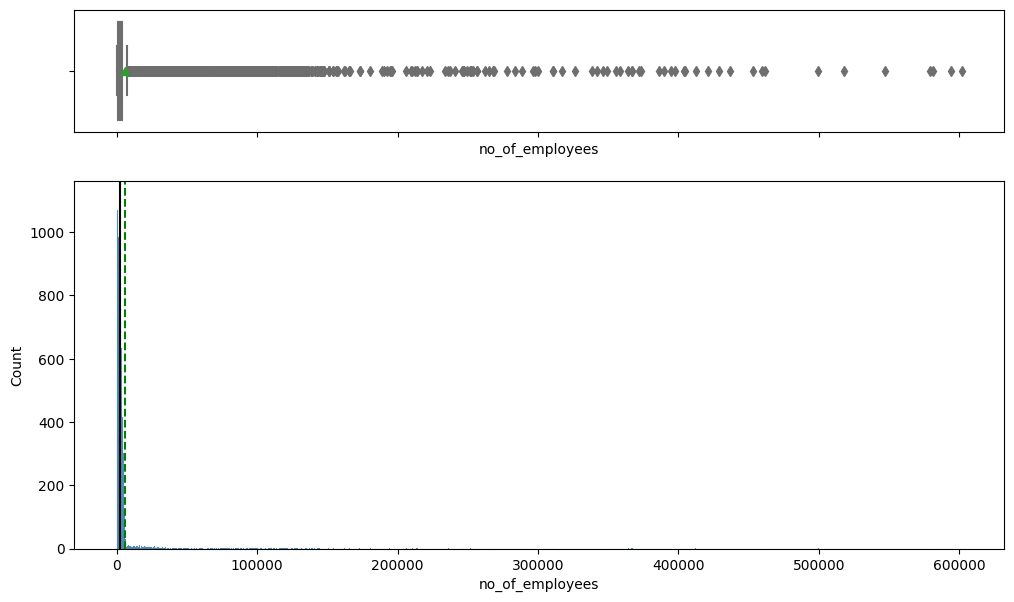

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

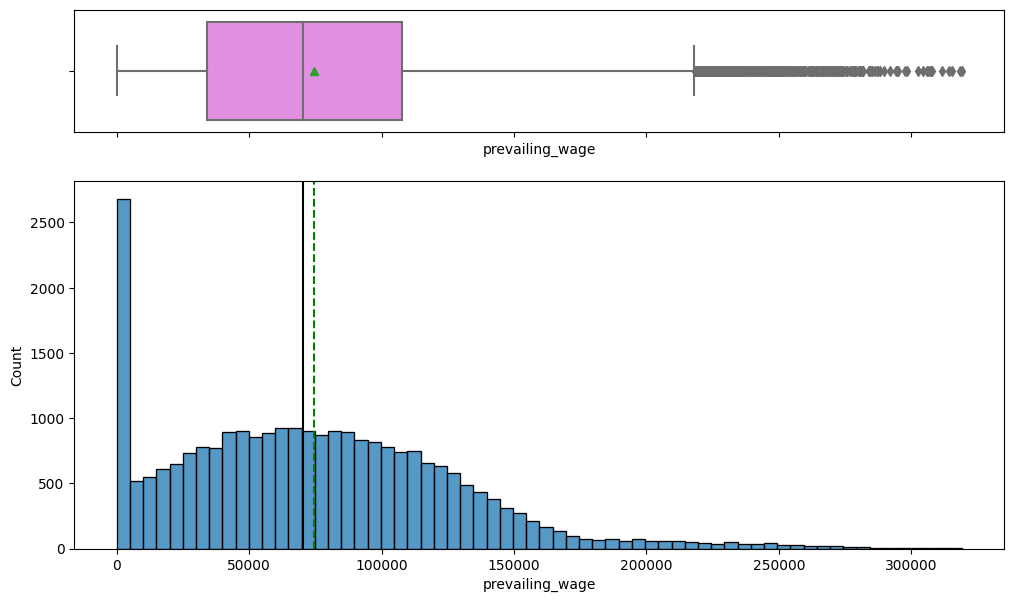

In [ ]:
histogram_boxplot(data,'prevailing_wage')

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage']<100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

Observation: Without information about the number of hours the applicant has worked or will work, determining the individual's annual wages is not feasible. Therefore, when taking into account the unit of wage, it becomes evident that there are numerous instances where hourly wages are below 100.

#### Observations on continent

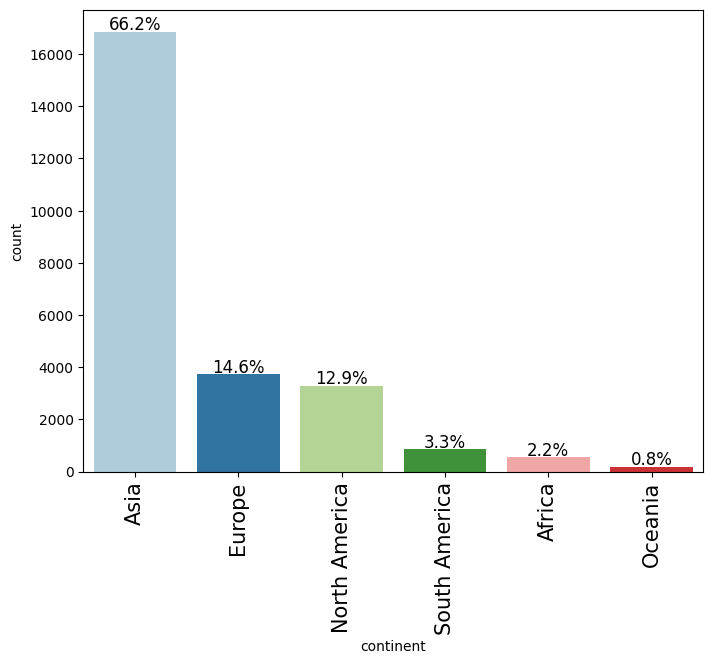

In [ ]:
labeled_barplot(data, "continent", perc=True)

Asia has most of the employees with 66%

#### Observations on education of employee

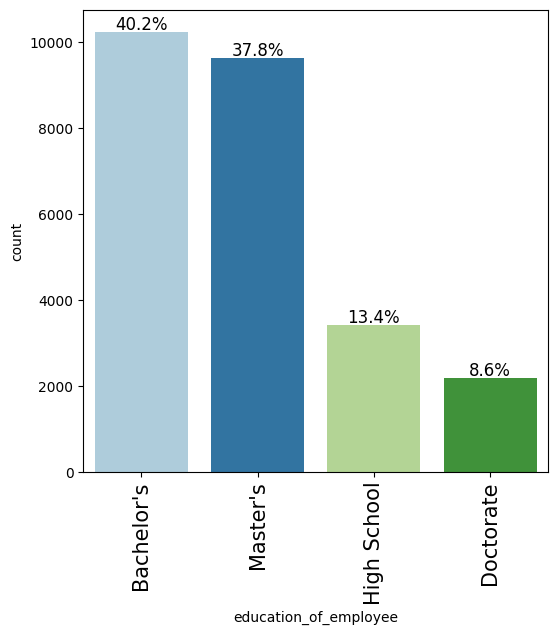

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

Most of the employees are Bachelor's closely followed by Master's

#### Observations on job experience

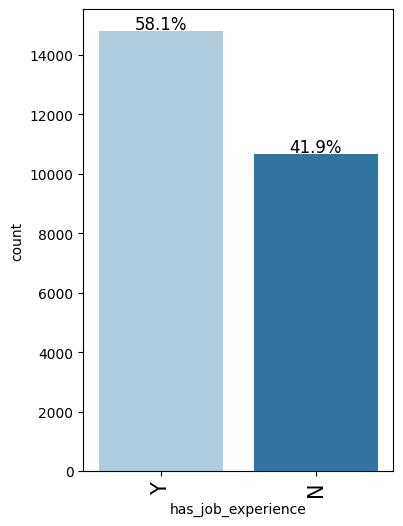

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

Around 58% of employes have prior job experience

#### Observations on job training

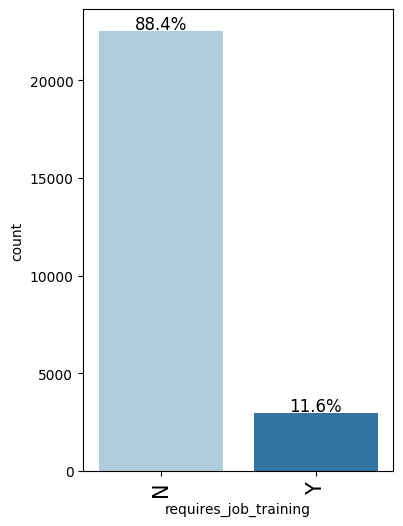

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

Majority of the employees don't require any training(88%).

####Observations on year of establishment

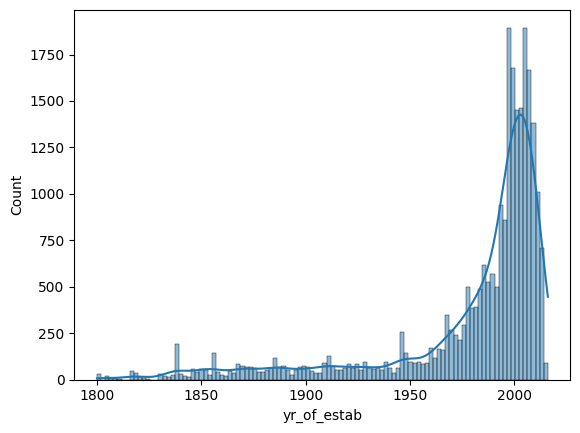

In [ ]:
sns.histplot(data= data,x='yr_of_estab',kde=True);

In [ ]:
data['yr_of_estab'].value_counts().head(10)

1998    1134
2005    1051
2001    1017
2007     994
1999     870
2004     846
2006     844
2000     806
1997     761
2010     743
Name: yr_of_estab, dtype: int64

In [ ]:
data[data['yr_of_estab']>1990].shape

(15530, 11)

Around 60% of the employer's company are established after 1990

#### Observations on region of employment

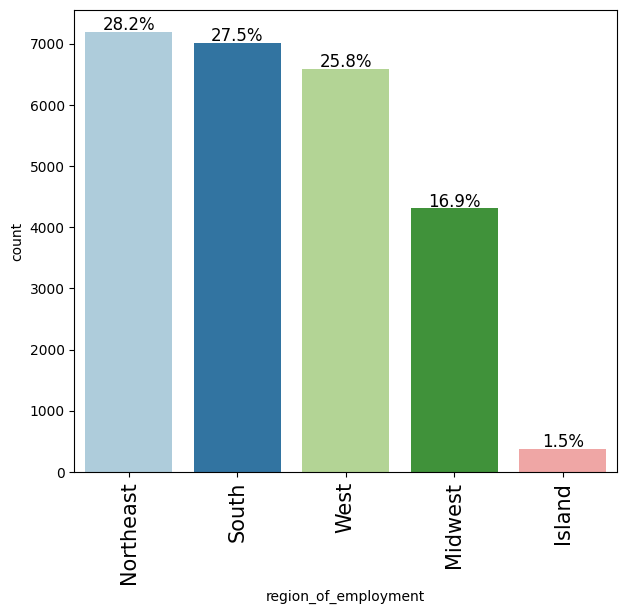

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

Northeast and South are top two regions of employment

#### Observations on unit of wage

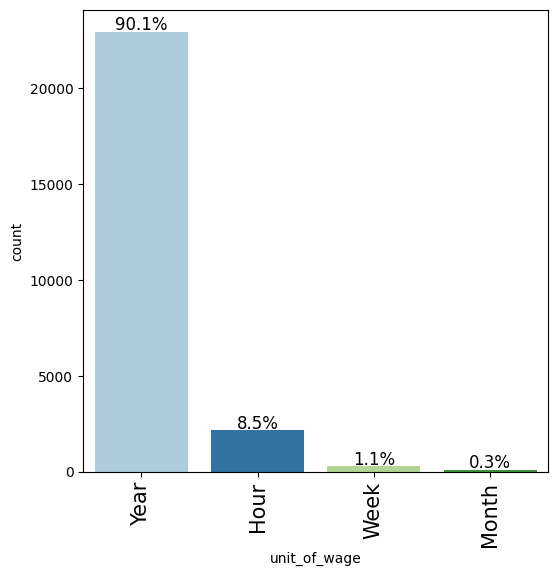

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

Around 90% of the employees work for yearly package while ones with hourly wages are around 8.5%

#### Observations on fulltime positions

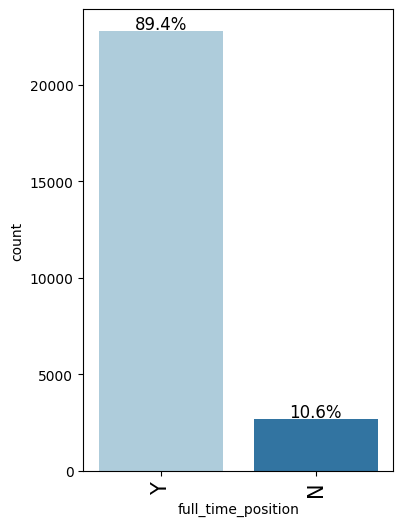

In [ ]:
labeled_barplot(data,'full_time_position',perc=True)

90% of the applicants are in a full time position.

#### Observations on case status

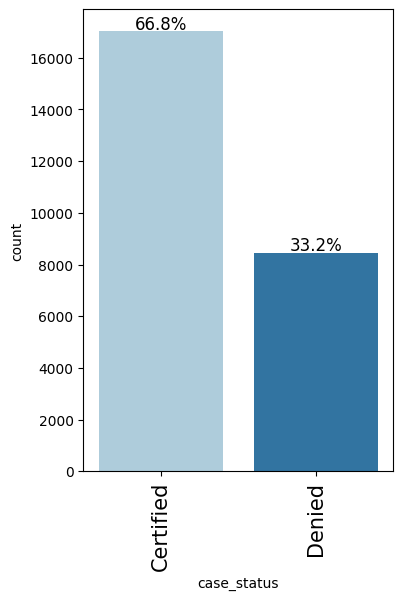

In [ ]:
labeled_barplot(data, "case_status", perc=True)

66% of the applicants have been certified for Visa and one third of the applicants are rejected.

### Bivariate Analysis

As the primary objective of this project is to develop models for forecasting employment visa certification, the emphasis in the bivariate analyses will be directed towards examining how various independent variables impact the target variable—specifically, the **case_status**.

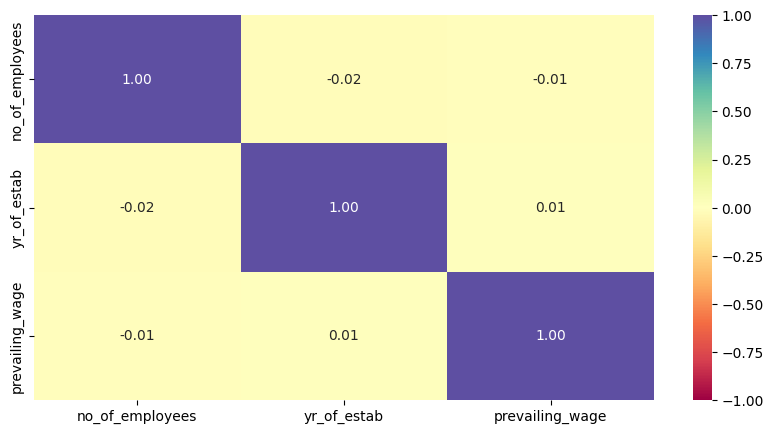

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is a negligible linear correlation observed among the numeric variables.

#### Observations on Case Status vs Continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


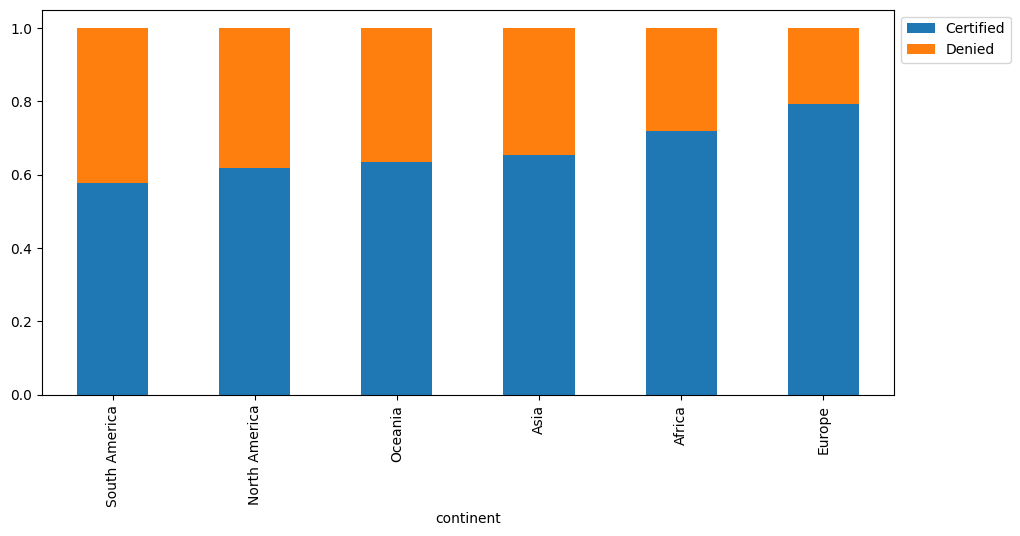

In [ ]:
stacked_barplot(data,'continent','case_status')

Regardless of the continent from which the employee originates, there is an overall higher certification rate compared to denials. The observed trend in terms of the percentage of visa certifications for continents is as follows: Europe has the highest certification rate, followed by Africa, Asia, Oceania, and North America & South America, with the latter two having the lowest certification rates.







#### Observations on Case Status vs Education of Employee

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


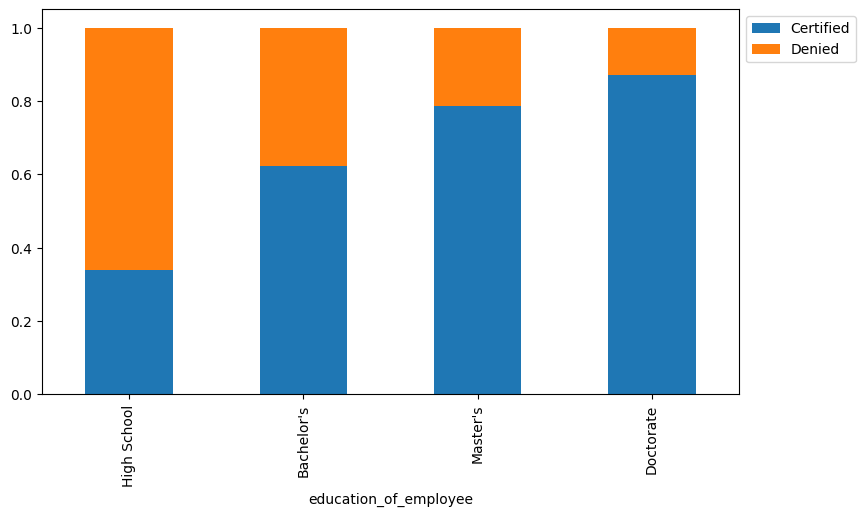

In [ ]:
stacked_barplot(data,'education_of_employee','case_status')


As anticipated, the trend observed in terms of the percentage of visa certifications based on the education level of employees is as follows: Doctorate > Master's > Bachelor's > High School.







#### Observations on Case Status vs Has Job Experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


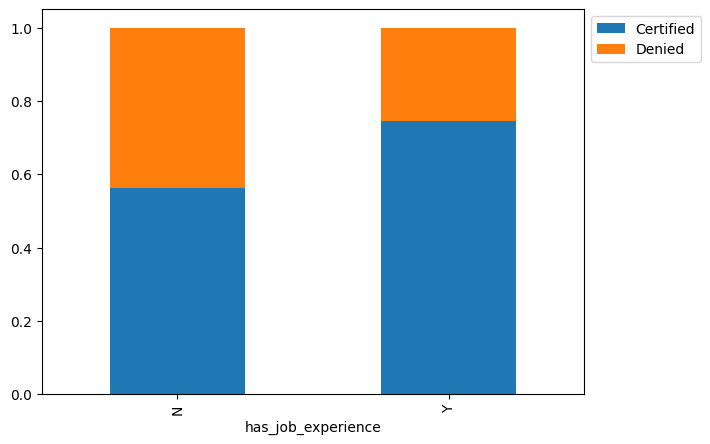

In [ ]:
stacked_barplot(data,'has_job_experience','case_status')

As anticipated, the trend observed in terms of the percentage of visa certifications for applicants with job experience is higher than for those without, following the order: Yes > No.

#### Observations on Case Status vs Requires Job Training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


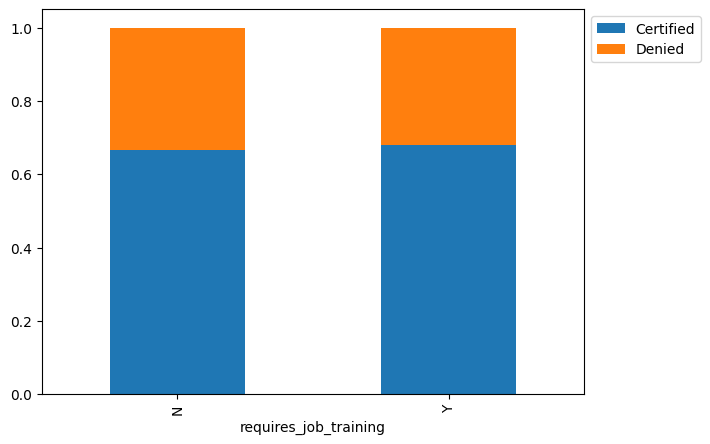

In [ ]:
stacked_barplot(data,'requires_job_training','case_status')


The observed trend regarding the percentage of visa certifications for applicants requiring job training is similar for both Yes and No categories.

#### Observations on Case Status vs Number of Employees

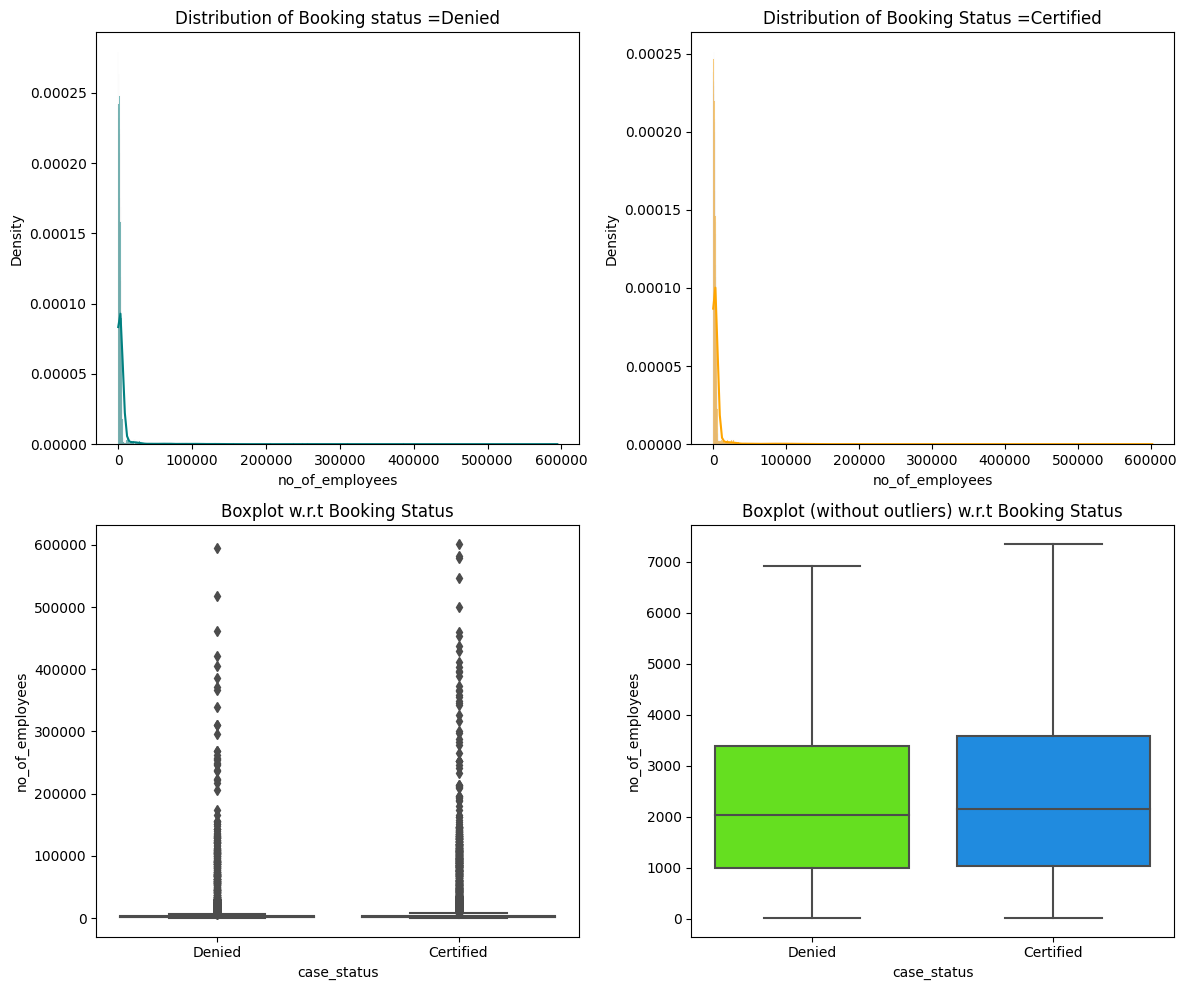

In [ ]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

A minimal distinction is noted in the distributions of the employer's number of employees between denied and certified applications. Therefore, it appears that the number of employees has an insignificant impact on the probability of visa certification.

#### Observations on Case Status vs Year of Establishment

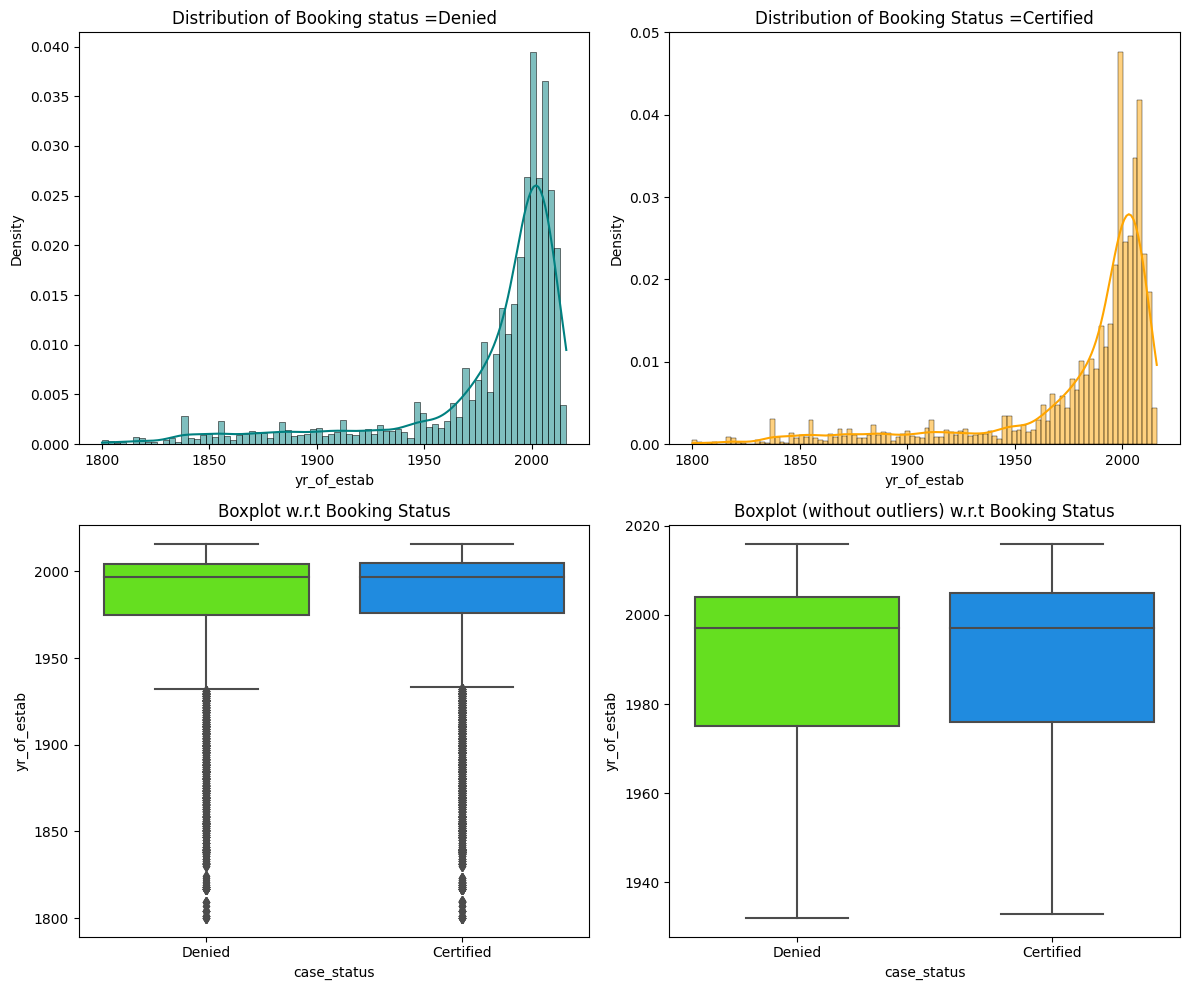

In [ ]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

There is a very small difference observed in the distributions of the employer's age for applications that are denied and those that are certified. Consequently, it appears that the number of years since establishment has an insignificant effect on the likelihood of visa certification.

#### Observations on Case Status vs Region of Employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


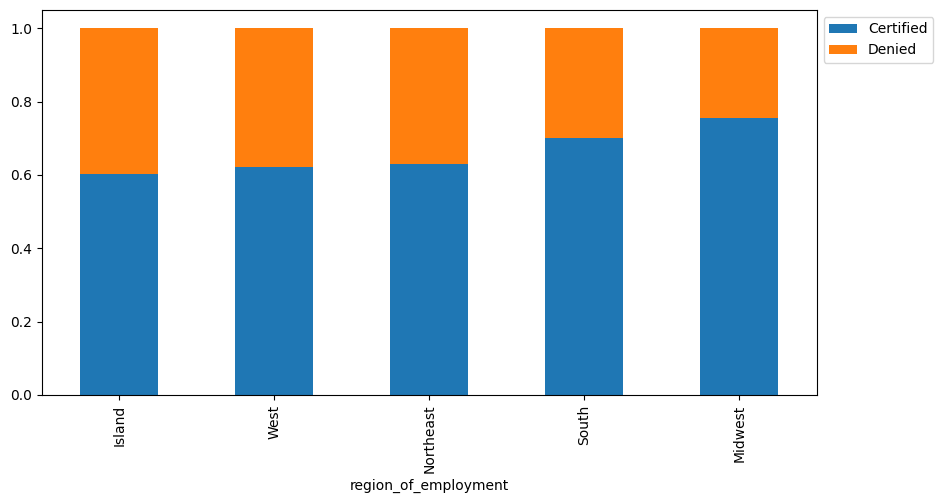

In [ ]:
stacked_barplot(data,'region_of_employment','case_status')

Regarding visa certifications for the region_of_employment is in the order of Midwest having the highest certification rate, followed by South, with Northeast and West having approximately similar certification rates, and Island having the lowest certification rate.







#### Observations on Case Status vs Prevailing Wage

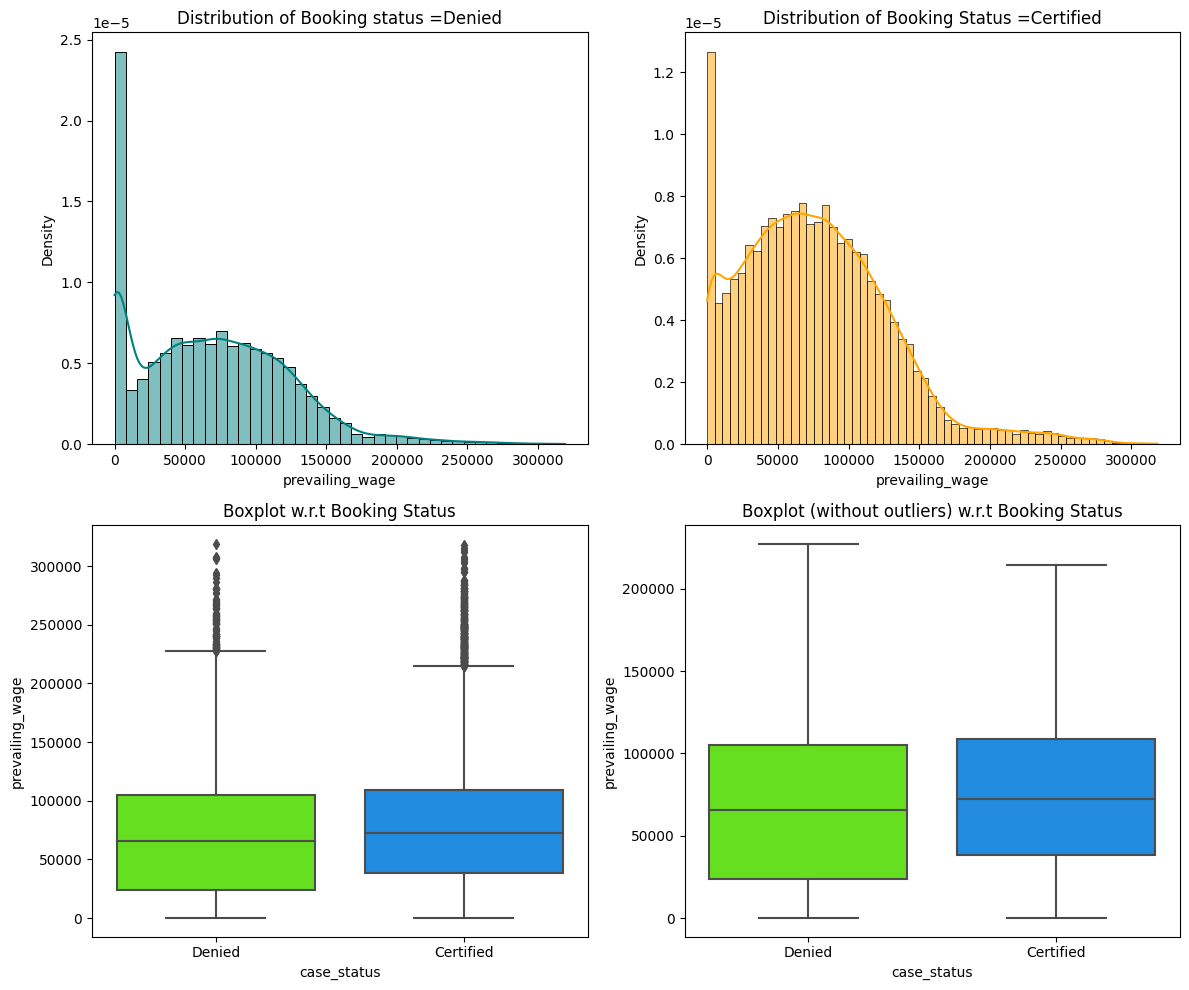

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")


There are noticeable outliers on both ends of the prevailing wage spectrum, with values below USD 10000 potentially indicating unskilled positions or those involving tip-based compensation, and values exceeding USD 200,000 likely corresponding to highly skilled roles. Despite these outliers, there is a general trend where the number of certified cases is approximately twice that of denied cases. The percentage of certifications compared to denials decreases slightly for lower prevailing wages and increases slightly for higher prevailing wages.

#### Observations on Case Status vs Unit of Wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


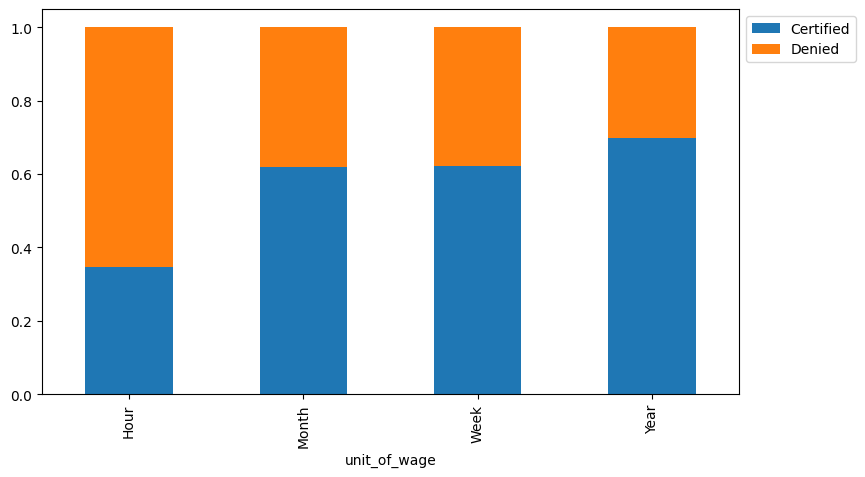

In [ ]:
stacked_barplot(data,'unit_of_wage','case_status')

Applicants whose wage unit is "year" have a higher likelihood of visa certification compared to those with other wage units, with approximately a 70% chance of approval. Conversely, applicants paid on an hourly basis are the least likely to receive visa certification, with a probability of around 35%. This observation aligns with expectations, as hourly jobs are typically considered less critical for the overall growth of the United States and may be suitable for local workers.

#### Observations on Case Status vs Full time position

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


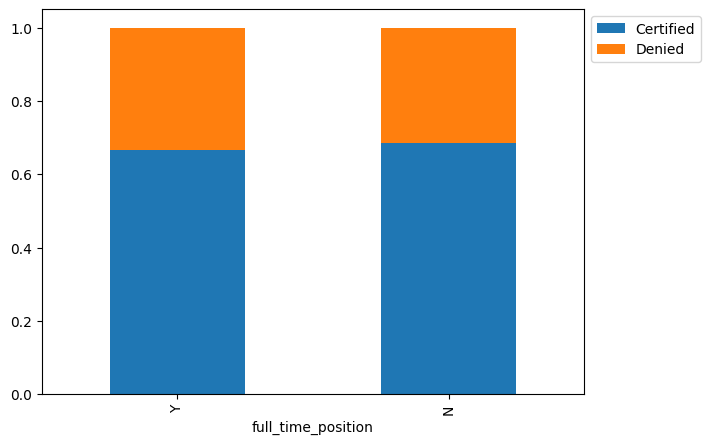

In [ ]:
stacked_barplot(data,'full_time_position','case_status')

The observed trend with respect to the percentage of visa certifications remains consistent for both full-time and part-time positions, with similar percentages for "Yes" and "No" categories.

###Leading Questions:








####1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?


In [ ]:
data.groupby('education_of_employee')['case_status'].value_counts()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: case_status, dtype: int64

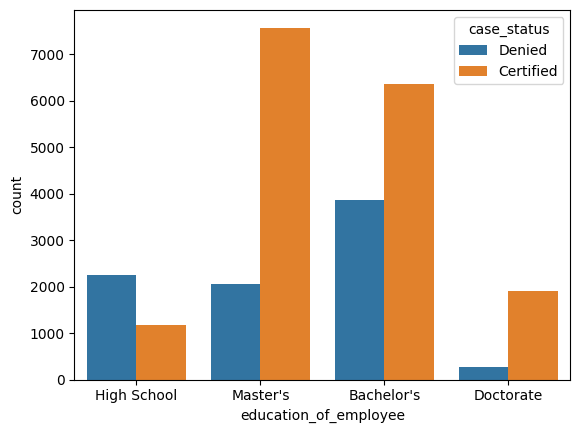

In [ ]:
sns.countplot(data=data,x='education_of_employee', hue="case_status");


The data confirms that the level of education indeed influences visa certification. It is evident that as the educational level rises, the count of denied visas decreases. As anticipated, the observed trend in terms of the percentage of visa certification for the education of employees follows the order: Doctorate > Master's > Bachelor's > High School.


####2. How does the visa status vary across different continents?

In [ ]:
data.groupby('continent')['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: case_status, dtype: int64

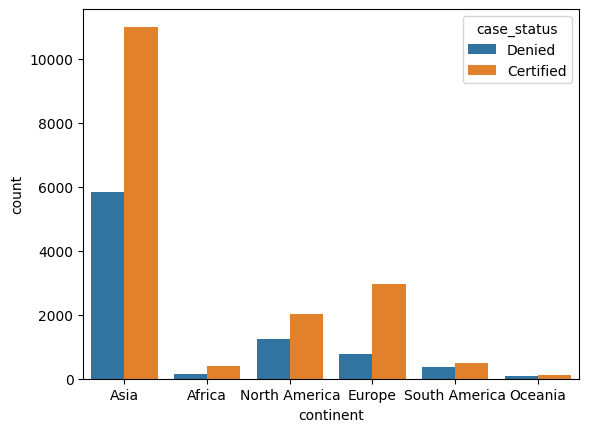

In [ ]:
sns.countplot(data=data,x='continent', hue="case_status");

Around two-thirds of all applications are from Asia, and these applicants exhibit an approval-to-denial ratio of nearly 2:1. European applicants, on the other hand, boast the most favorable ratio of approvals to denials, approximately 4:1. Regardless of the applicant's continent of origin, the number of certified cases exceeds the number of denials.

####3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [ ]:
data.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: case_status, dtype: int64

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


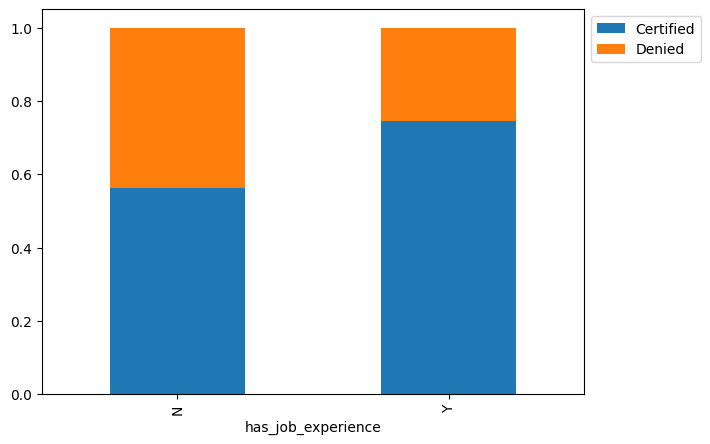

In [ ]:
stacked_barplot(data,'has_job_experience','case_status')

Candidates with work experience demonstrate a positive ratio of approximately 3:1 for approved to denied applications, while those without job experience show a nearly equivalent ratio of about 5:4. As anticipated, the trend in the percentage of visa certifications for individuals with job experience is higher compared to those without, with the order being Yes > No. The number of certified visas is greater for applicants with job experience



####4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [ ]:
data.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: case_status, dtype: int64

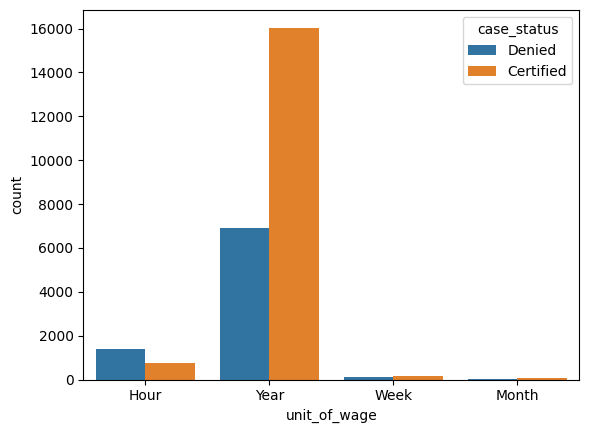

In [ ]:
sns.countplot(data=data,x='unit_of_wage', hue="case_status");

Applicants seeking positions with an hourly rate experience an approval-to-denial ratio of approximately 1:2. Despite constituting only about 8% of all applications, these candidates make up approximately 17% of all denials.

In contrast, applicants from other unit_of_wage categories display an overall ratio of approvals to denials of approximately 2:1. Specifically, applications for positions with annual salaries show a notable ratio of nearly 2.5:1 for approvals to denials.

####5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

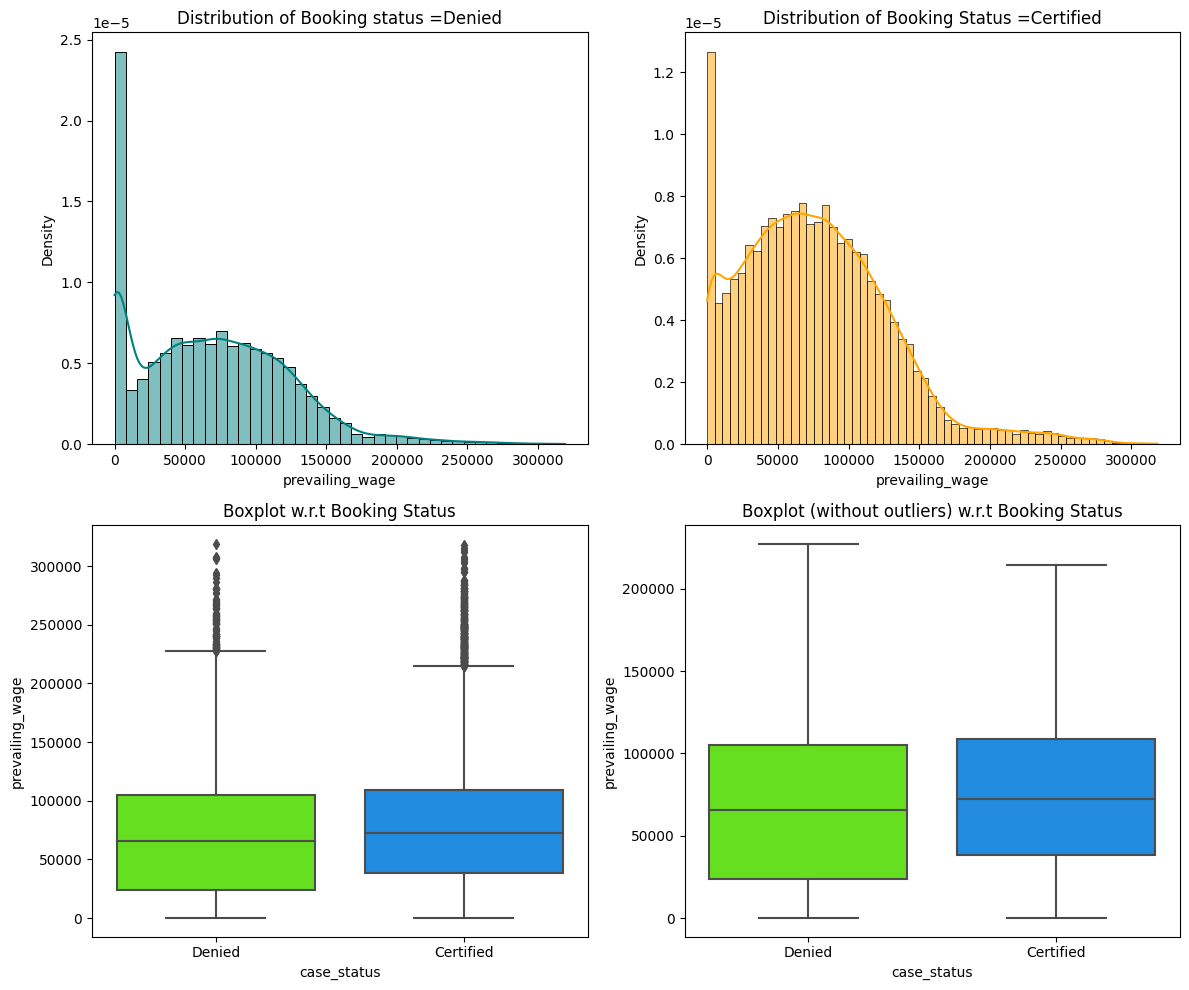

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

In [ ]:
data.groupby('unit_of_wage')['prevailing_wage'].mean()

unit_of_wage
Hour       414.570513
Month    87592.864045
Week     85606.820515
Year     81228.077133
Name: prevailing_wage, dtype: float64

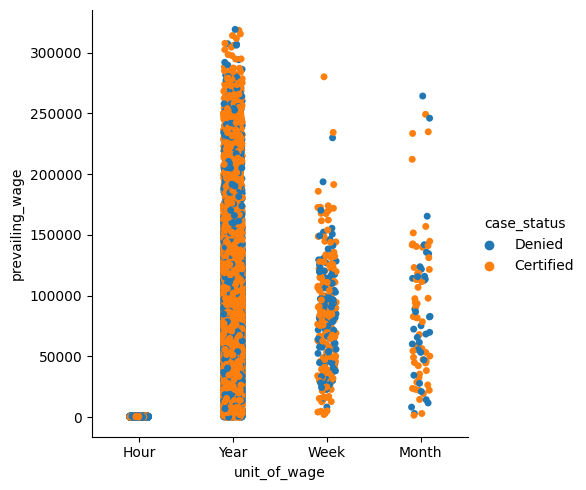

In [ ]:
#Analysing Prevailing wage with unit of wages vs case status
sns.catplot(data= data, y='prevailing_wage',x='unit_of_wage',hue='case_status');

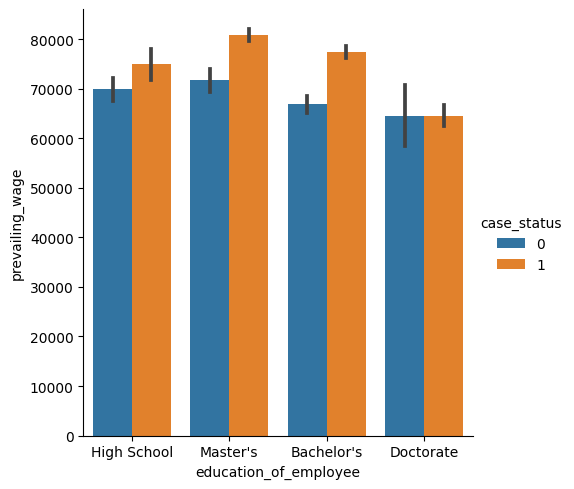

In [ ]:
sns.catplot(data= data, y='prevailing_wage',x='education_of_employee',hue='case_status',kind='bar');


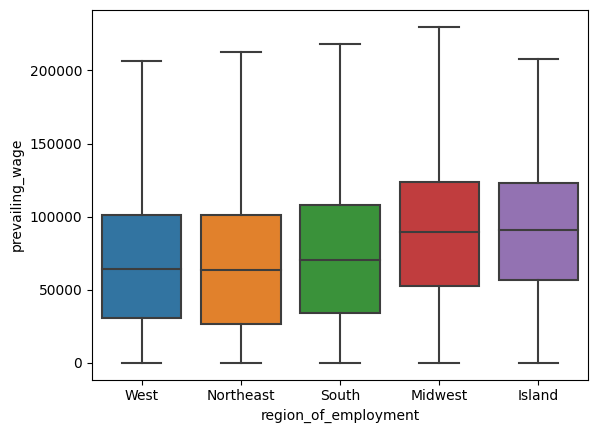

In [ ]:
sns.boxplot(data, x="region_of_employment", y="prevailing_wage", showfliers=False);

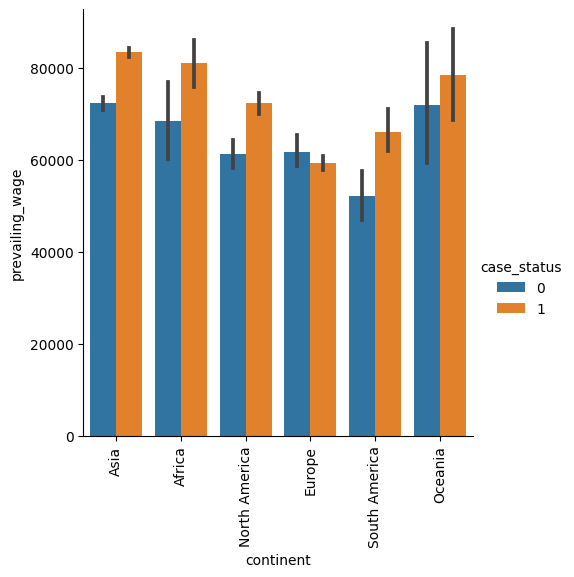

In [ ]:
sns.catplot(data= data, y='prevailing_wage',x='continent',hue='case_status',kind='bar')
plt.xticks(rotation=90)
plt.show()

The prevailing wage, established by the US government to safeguard local and foreign workers, exhibits variations across different categories. Notably, Europe has the lowest prevailing wage among continents, and individuals with higher education levels, especially doctorates, tend to have lower prevailing wages. Job experience is associated with a lower prevailing wage, while the Island and Midwest regions command higher prevailing wages.

## Data Preprocessing


### Outlier Check

- Let's check for outliers in the data.

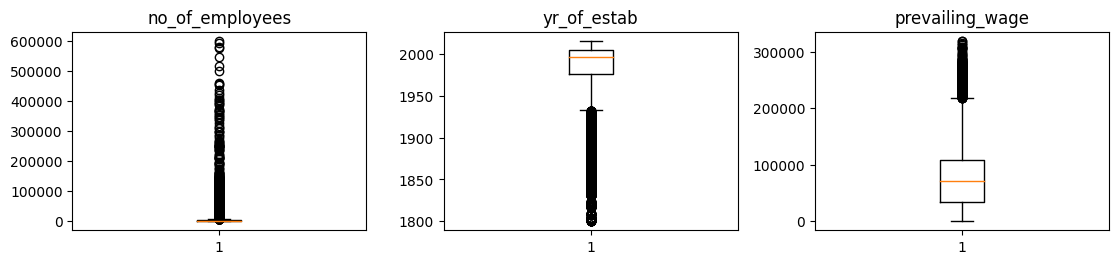

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(5, 4, i + 1)
  plt.boxplot(data[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()

The dataset appears to contain realistic values, and the absence of domain knowledge may lead to challenges in handling outliers. It seems that no specific treatment has been applied to address outliers, and the analysis is proceeding without outlier treatment.

###Preprocessing data for Model Building

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
# specifying the independent  and dependent variables
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

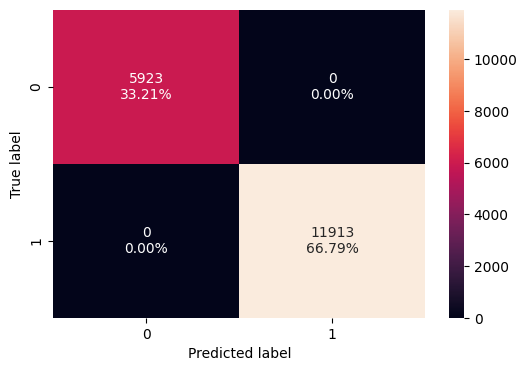

In [ ]:
confusion_matrix_sklearn(model,X_train,y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model,X_train,y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

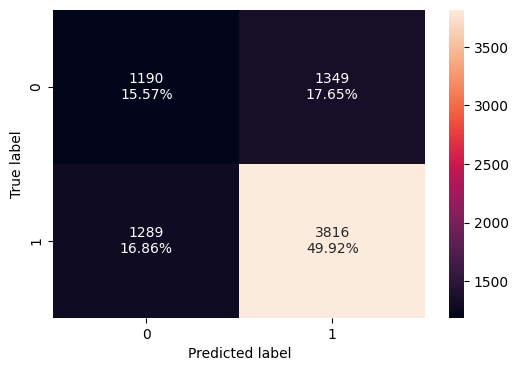

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.654893,0.747502,0.738819,0.743135


The model exhibits overfitting as evidenced by the F1 score of 75% on the test data.

### Hyperparameter Tuning - Decision Tree

In [ ]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(10, 20, 5),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

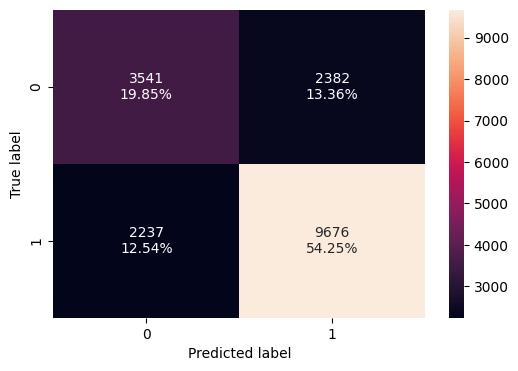

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.741029,0.812222,0.802455,0.807309


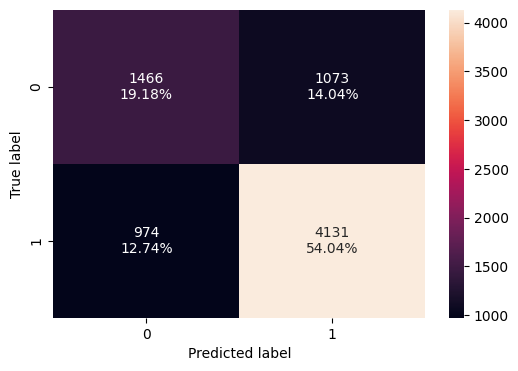

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732208,0.809207,0.793812,0.801436


The model is not overfitting and demonstrates good predictive performance with an 80% F1 score on both the test and train data.

## Building bagging and boosting models

### Bagging - Model Building and Hyperparameter Tuning

#### Bagging Classifier

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

##### Checking model performance on training set

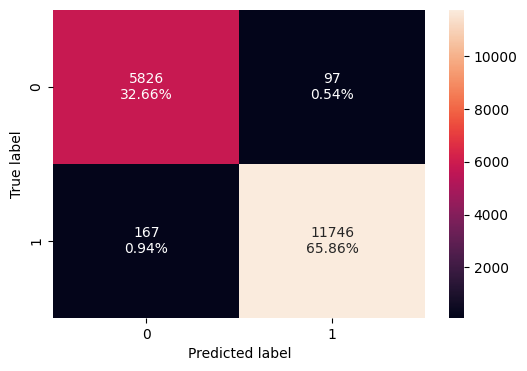

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


##### Checking model performance on test set

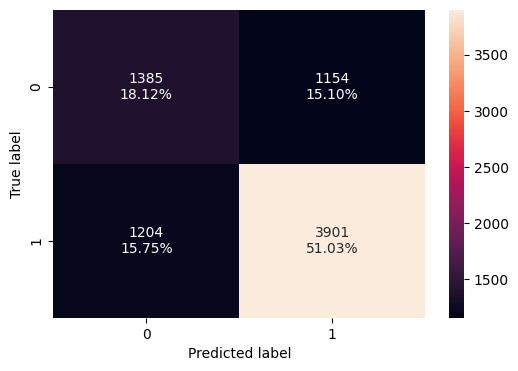

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


The model appears to be overfitting with a 75% F1 score on the test data.

#### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.5,0.6,0.8],
    'max_features': [0.6,0.7,0.8],
    'n_estimators' : [30,50,70,100],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.5, n_estimators=100,
                  random_state=1)

##### Checking model performance on training set

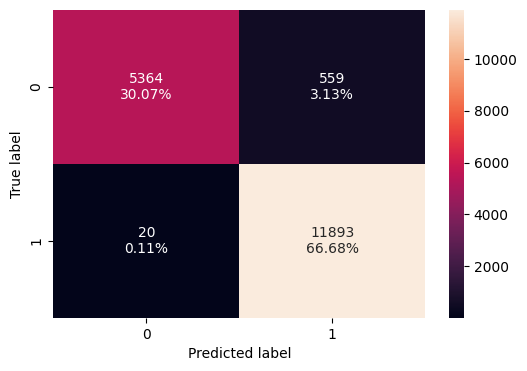

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.967538,0.998321,0.955108,0.976236


##### Checking model performance on test set

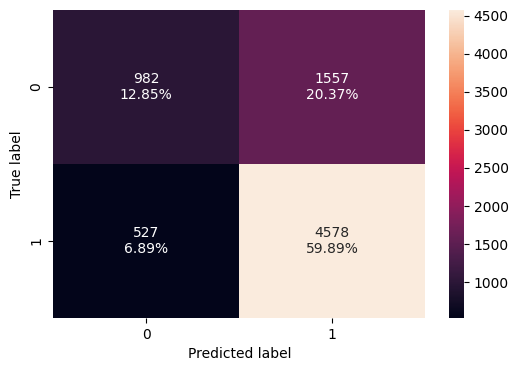

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.896768,0.74621,0.814591


The model is showing signs of overfitting and achieves an F1 score of 81% on the test data.

#### Random Forest

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1,class_weight='balanced')
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

##### Checking model performance on training set

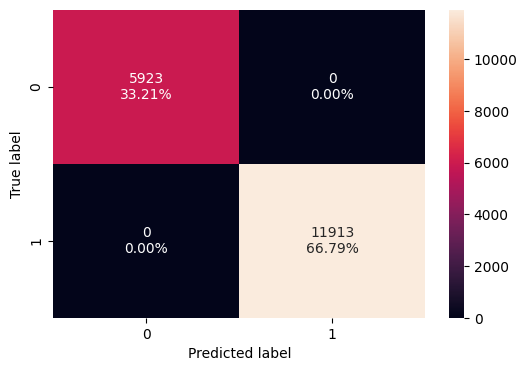

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


##### Checking model performance on test set

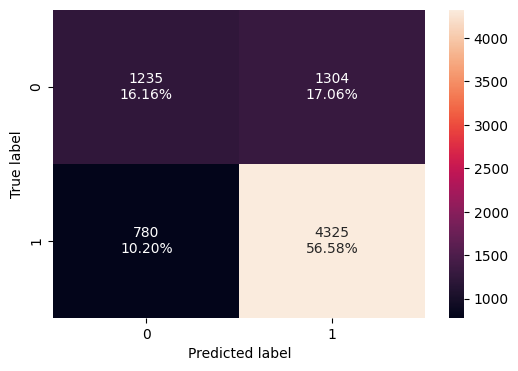

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


The model exhibits signs of overfitting and attains an F1 score of 80% on the test data.

#### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.4, min_samples_leaf=3,
                       n_estimators=110, oob_score=True, random_state=1)

##### Checking model performance on training set

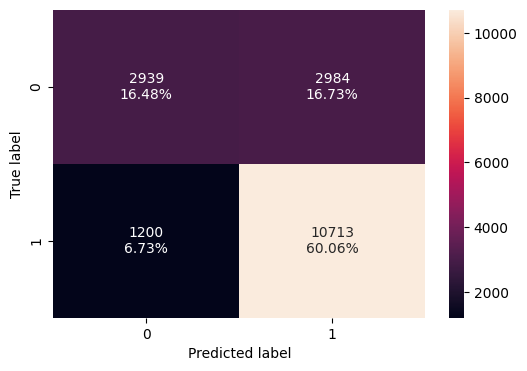

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765418,0.89927,0.782142,0.836626


##### Checking model performance on test set

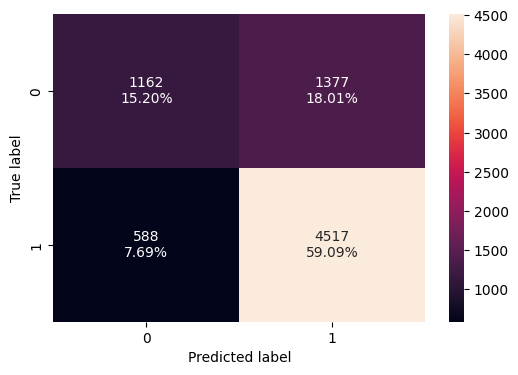

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742936,0.884819,0.766373,0.821347



The model demonstrates strong performance, yielding an F1 score of approximately 82% on both the test and training datasets.

### Boosting - Model Building and Hyperparameter Tuning

#### AdaBoost Classifier

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

##### Checking model performance on training set

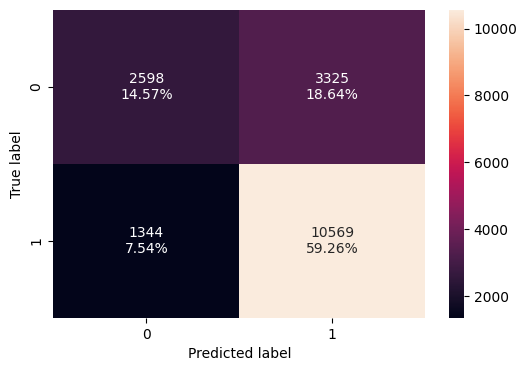

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


##### Checking model performance on test set

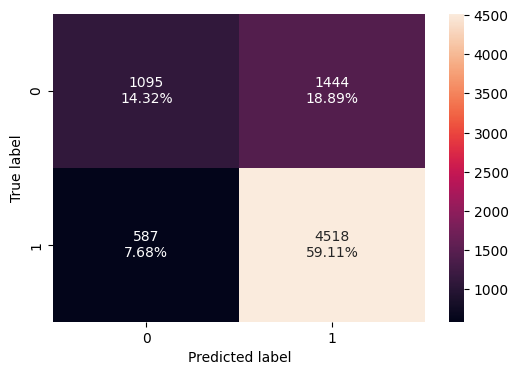

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481



The model performs well, indicating no signs of overfitting and achieving an F1 score of 81%.

#### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1)
    ],
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.05, random_state=1)

##### Checking model performance on training set

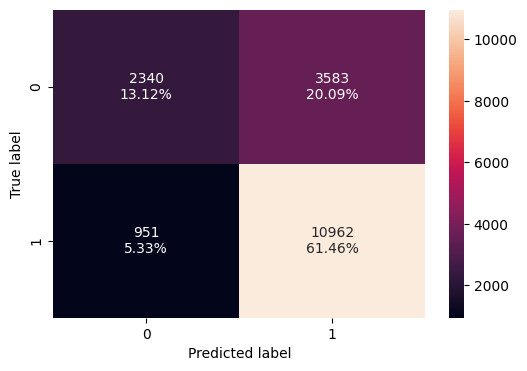

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.745795,0.920171,0.753661,0.828634


##### Checking model performance on test set

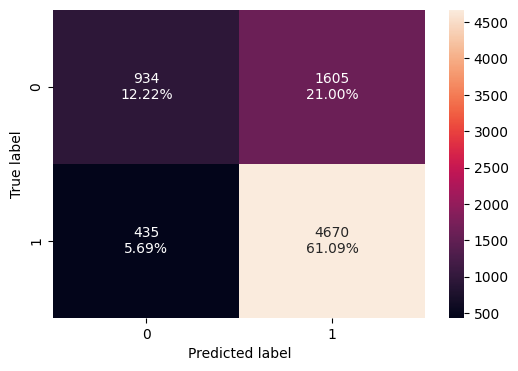

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733124,0.914789,0.744223,0.820738


This model exhibits a Recall score of 91%, suggesting that it is better suited for capturing events when prioritizing the identification of positive instances is crucial.

#### Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

##### Checking model performance on training set

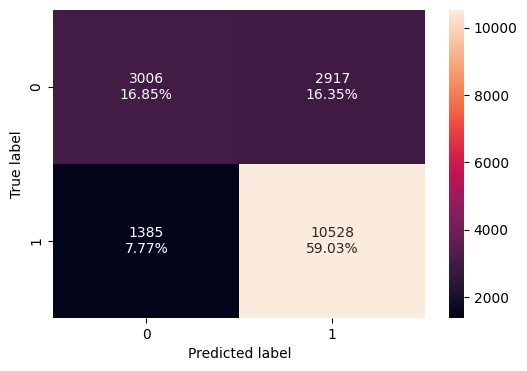

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


##### Checking model performance on test set

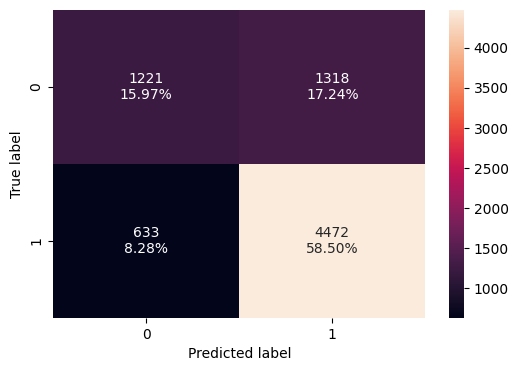

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


The model is not overfitting and attains an F1 score of 82% on the test data.

#### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

##### Checking model performance on training set

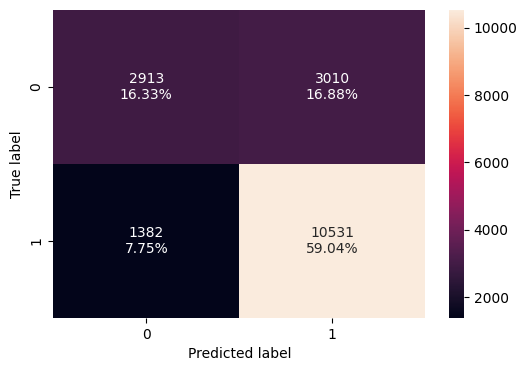

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753756,0.883992,0.777712,0.827453


##### Checking model performance on test set

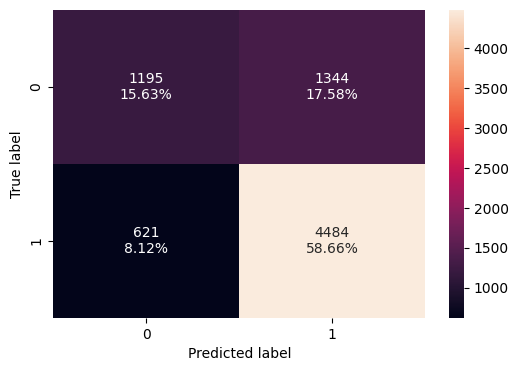

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742936,0.878355,0.769389,0.820269


The model demonstrates strong performance in both the training and test sets, achieving an F1 score of approximately 82%.

#### XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

##### Checking model performance on training set

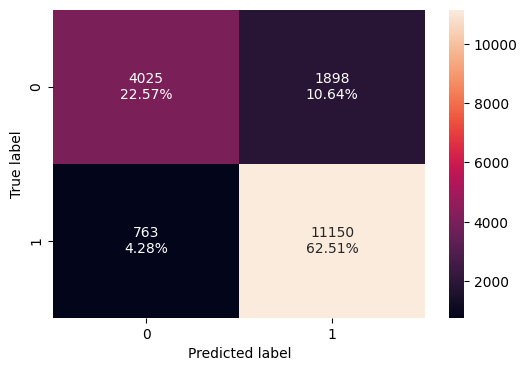

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


##### Checking model performance on test set

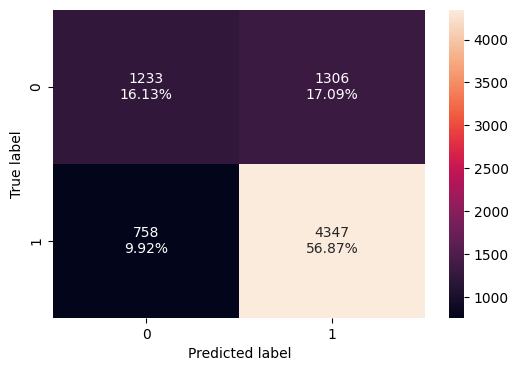

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.729984,0.851518,0.768972,0.808143


The model does not exhibit overfitting and achieves an F1 score of 81% on the test data.

#### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    'n_estimators':np.arange(50,110,25),
    'scale_pos_weight':[1,2,5],
    'learning_rate':[0.01,0.1,0.05],
    'gamma':[1,3],
    'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

##### Checking model performance on training set

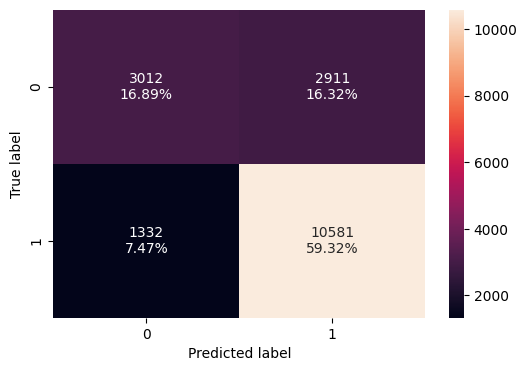

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


##### Checking model performance on test set

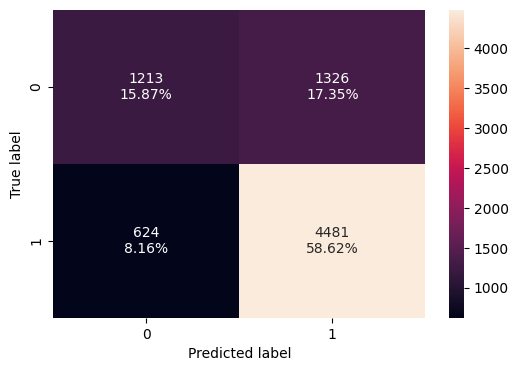

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298



The model is not overfitting and achieves an 82% F1 score on the test set.

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       oob_score=Tru...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

### Checking model performance on training set

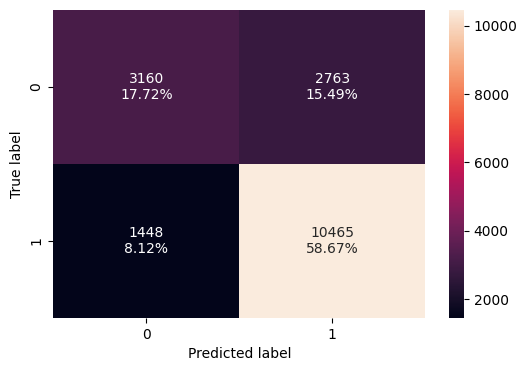

In [ ]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.763904,0.878452,0.791125,0.832505


### Checking model performance on test set

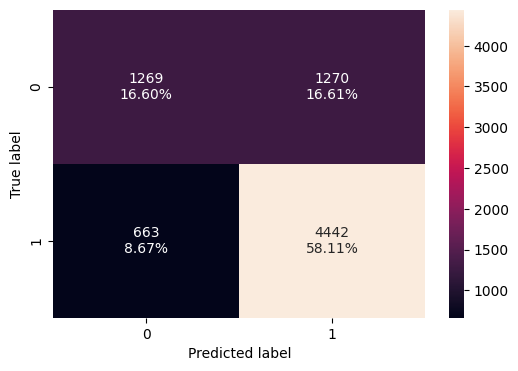

In [ ]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.747122,0.870127,0.777661,0.8213


The model is not experiencing overfitting and demonstrates an F1 score of 82%.

##  Will tuning the hyperparameters improve the model performance?

In [ ]:
#performance of the tuned models on the training data

tuned_models_train_comp_df = pd.concat(
    [dtree_estimator_model_train_perf.T,
     bagging_estimator_tuned_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     abc_tuned_model_train_perf.T,
     gbc_tuned_model_train_perf.T,
     xgb_tuned_model_train_perf.T],
    axis=1,
)
tuned_models_train_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Training performance comparison of tuned models:")
tuned_models_train_comp_df

Training performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.741029,0.967538,0.765418,0.745795,0.753756,0.762110
Recall,0.812222,0.998321,0.899270,0.920171,0.883992,0.888189
Precision,0.802455,0.955108,0.782142,0.753661,0.777712,0.784243
F1,0.807309,0.976236,0.836626,0.828634,0.827453,0.832986


In [ ]:
#performance of the tuned models on the testing data

tuned_models_test_comp_df = pd.concat(
    [dtree_estimator_model_test_perf.T,
     bagging_estimator_tuned_model_test_perf.T,
     rf_tuned_model_test_perf.T,
     abc_tuned_model_test_perf.T,
     gbc_tuned_model_test_perf.T,
     xgb_tuned_model_test_perf.T],
    axis=1,
)
tuned_models_test_comp_df.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned AdaBoost Classifier",
    "Tuned Gradient Boosting Classifier",
    "Tuned XGBoost Classifier"]
print("Testing performance comparison of tuned models:")
tuned_models_test_comp_df

Testing performance comparison of tuned models:


,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned AdaBoost Classifier,Tuned Gradient Boosting Classifier,Tuned XGBoost Classifier
Accuracy,0.732208,0.727368,0.742936,0.733124,0.742936,0.744898
Recall,0.809207,0.896768,0.884819,0.914789,0.878355,0.877767
Precision,0.793812,0.746210,0.766373,0.744223,0.769389,0.771655
F1,0.801436,0.814591,0.821347,0.820738,0.820269,0.821298


Tuning the model significantly increases the performance of the model and helps in better prediction.The tuned models demonstrate high performance on both training and testing datasets, indicating generalizability and mitigating the risk of overfitting. The models provide an accuracy of 75% on the test dataset and an F1 score of ~82%, highlighting their effectiveness in classification tasks.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.741029,0.985198,0.967538,1.0,0.765418,0.738226,0.745795,0.758802,0.753756,0.850807,0.762110,0.763904
Recall,1.0,0.812222,0.985982,0.998321,1.0,0.899270,0.887182,0.920171,0.883740,0.883992,0.935952,0.888189,0.878452
Precision,1.0,0.802455,0.991810,0.955108,1.0,0.782142,0.760688,0.753661,0.783042,0.777712,0.854537,0.784243,0.791125
F1,1.0,0.807309,0.988887,0.976236,1.0,0.836626,0.819080,0.828634,0.830349,0.827453,0.893394,0.832986,0.832505


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.654893,0.732208,0.691523,0.727368,0.727368,0.742936,0.734301,0.733124,0.744767,0.742936,0.729984,0.744898,0.747122
Recall,0.747502,0.809207,0.764153,0.896768,0.847209,0.884819,0.885015,0.914789,0.876004,0.878355,0.851518,0.877767,0.870127
Precision,0.738819,0.793812,0.771711,0.746210,0.768343,0.766373,0.757799,0.744223,0.772366,0.769389,0.768972,0.771655,0.777661
F1,0.743135,0.801436,0.767913,0.814591,0.805851,0.821347,0.816481,0.820738,0.820927,0.820269,0.808143,0.821298,0.821300


Based on the F1 scores on the test set, the models with the highest F1 scores are the **Tuned Random Forest, XGBoost Classifier Tuned,** and **Stacking Classifier**, all with an F1 score of 82.13%. These models have demonstrated a good balance between precision and recall on new, unseen data.

While models like XGBoost and the Stacking Classifier also perform well, there might be trade-offs to consider. For example, XGBoost might be computationally efficient but less interpretable, and the Stacking Classifier combines multiple models, which might introduce complexity.

Since Random Forest is known for its efficiency and ability to handle large datasets. It benefits from parallel processing during the training phase, making it computationally efficient. The **Tuned Random Forest,** with a high F1 score, provides a good balance between performance and efficiency.

Precision and recall are both high, with 77% precision and 88% recall. This indicates that the model is adept at correctly identifying positive cases (visa certifications) but may be limited in correctly identifying negative cases (visa denials).

For the sake of simplicity and various other benefits explained above, I opted for the **Tuned Random Forest**.

### Important features of the final model

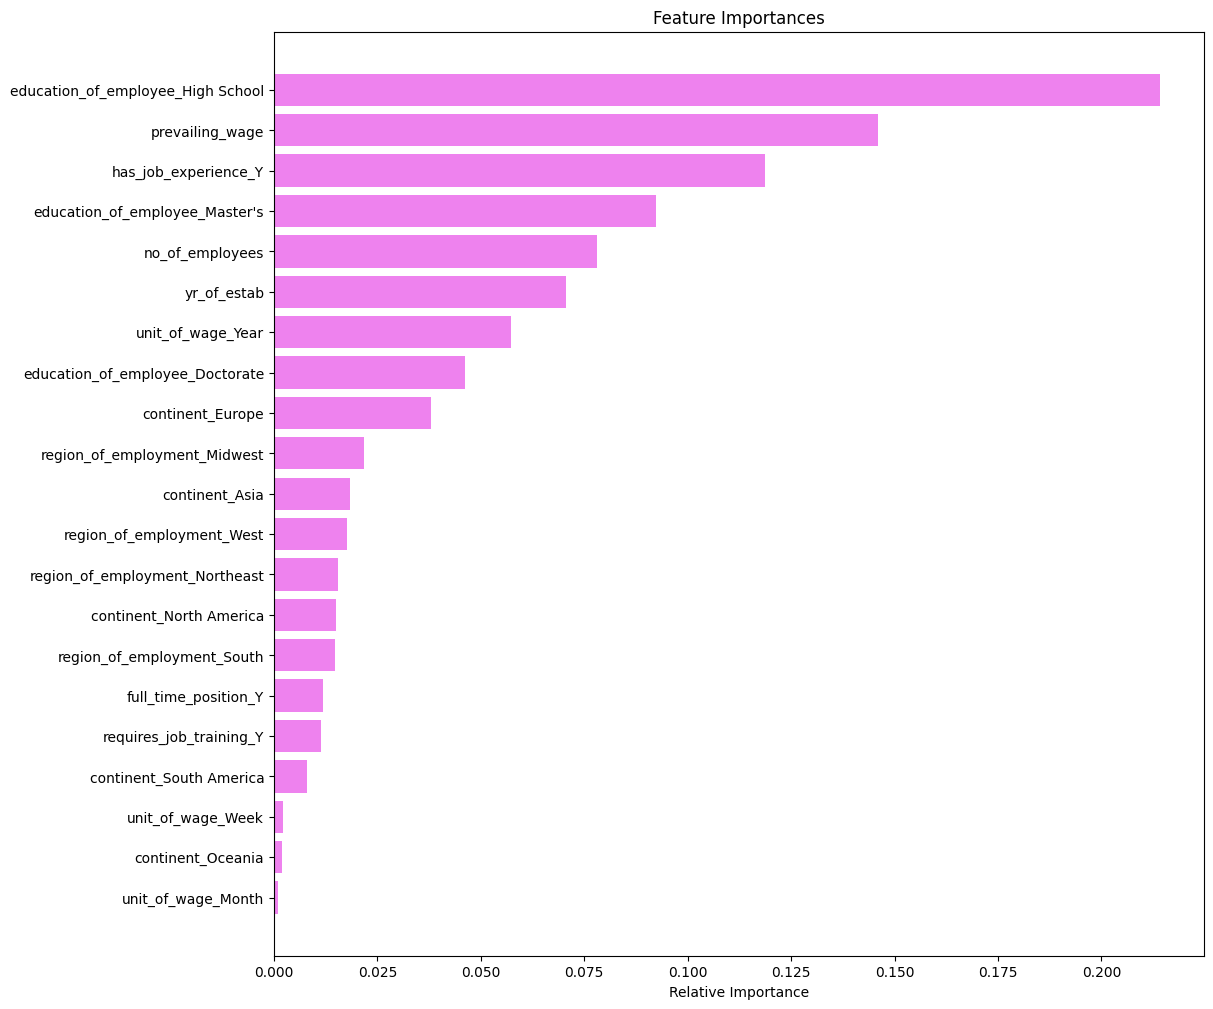

In [ ]:
#Final model is Tuned Random forest
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                        Imp
education_of_employee_High School  0.214066
prevailing_wage                    0.145944
has_job_experience_Y               0.118602
education_of_employee_Master's     0.092334
no_of_employees                    0.078077
yr_of_estab                        0.070489
unit_of_wage_Year                  0.057391
education_of_employee_Doctorate    0.046050
continent_Europe                   0.037841
region_of_employment_Midwest       0.021794


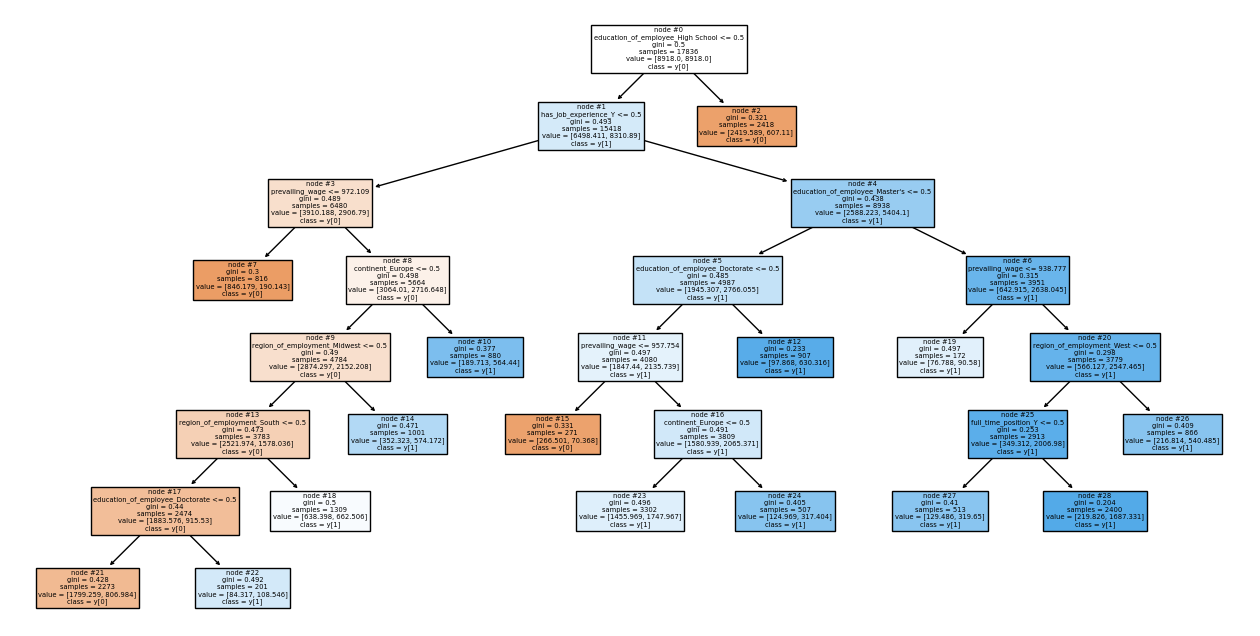

In [ ]:
from sklearn import tree
#create visualization of tuned decision-tree model
feature_names = list(X.columns)
plt.figure(figsize=(16,8))
tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,node_ids=True,class_names=True)
plt.show()